In [7]:
import sys

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from scipy.linalg import svd

sys.path.append("../")
from utils import load_data, StrokeParams, FetalHealthParams

def calculate_vif(dataframe):
    """Calculate Variance Inflation Factor (VIF) for each feature in the DataFrame."""
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

def plot_correlation_matrix(dataframe, title):
    """Plot the correlation matrix of the DataFrame."""
    corr_matrix = dataframe.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
    plt.title(f"Correlation Matrix: {title}")
    plt.show()

def calculate_dataset_collinearity_metrics(dataframe):
    # Calculate correlation matrix
    corr_matrix = dataframe.corr()

    # Calculate condition number
    U, s, Vt = svd(corr_matrix)
    condition_number = s.max() / s.min()

    # Calculate determinant of correlation matrix
    determinant = np.linalg.det(corr_matrix)

    # Sum of absolute off-diagonal elements
    sum_off_diagonal = np.sum(np.abs(corr_matrix.values)) - np.sum(np.diag(np.abs(corr_matrix.values)))

    metrics = {
        "Condition Number": condition_number,
        "Determinant of Correlation Matrix": determinant,
        "Sum of Absolute Off-Diagonal Elements": sum_off_diagonal
    }

    return metrics

if __name__ == "__main__":
    # load data
    strokeX, strokeY = load_data(StrokeParams.data_train, StrokeParams.target_column)
    strokeX.drop(columns=StrokeParams.cat_cols, inplace=True)
    fetalX, fetalY = load_data(FetalHealthParams.data_train, FetalHealthParams.target_column)
    fetalX.drop(columns=FetalHealthParams.cat_cols, inplace=True)

Stroke Prediction


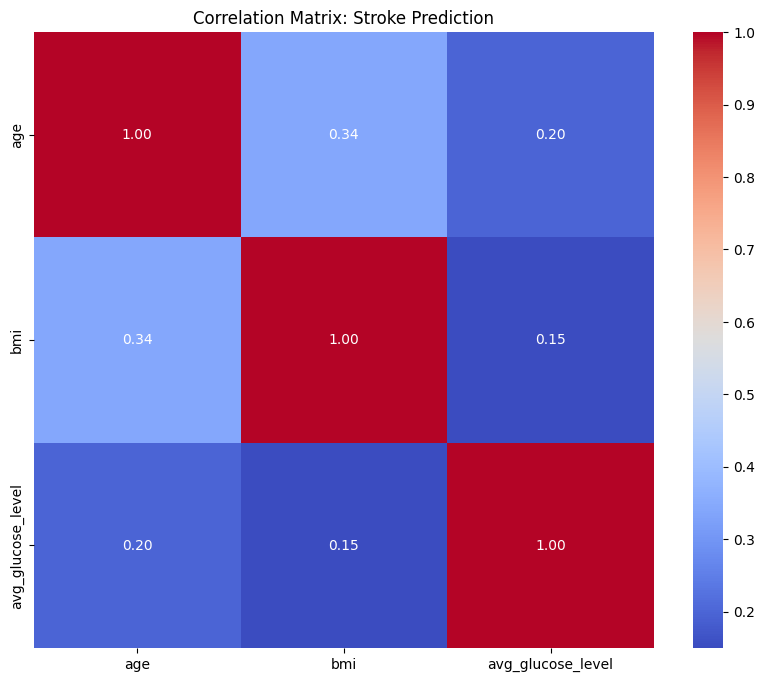

Fetal Health Classification


/opt/homebrew/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


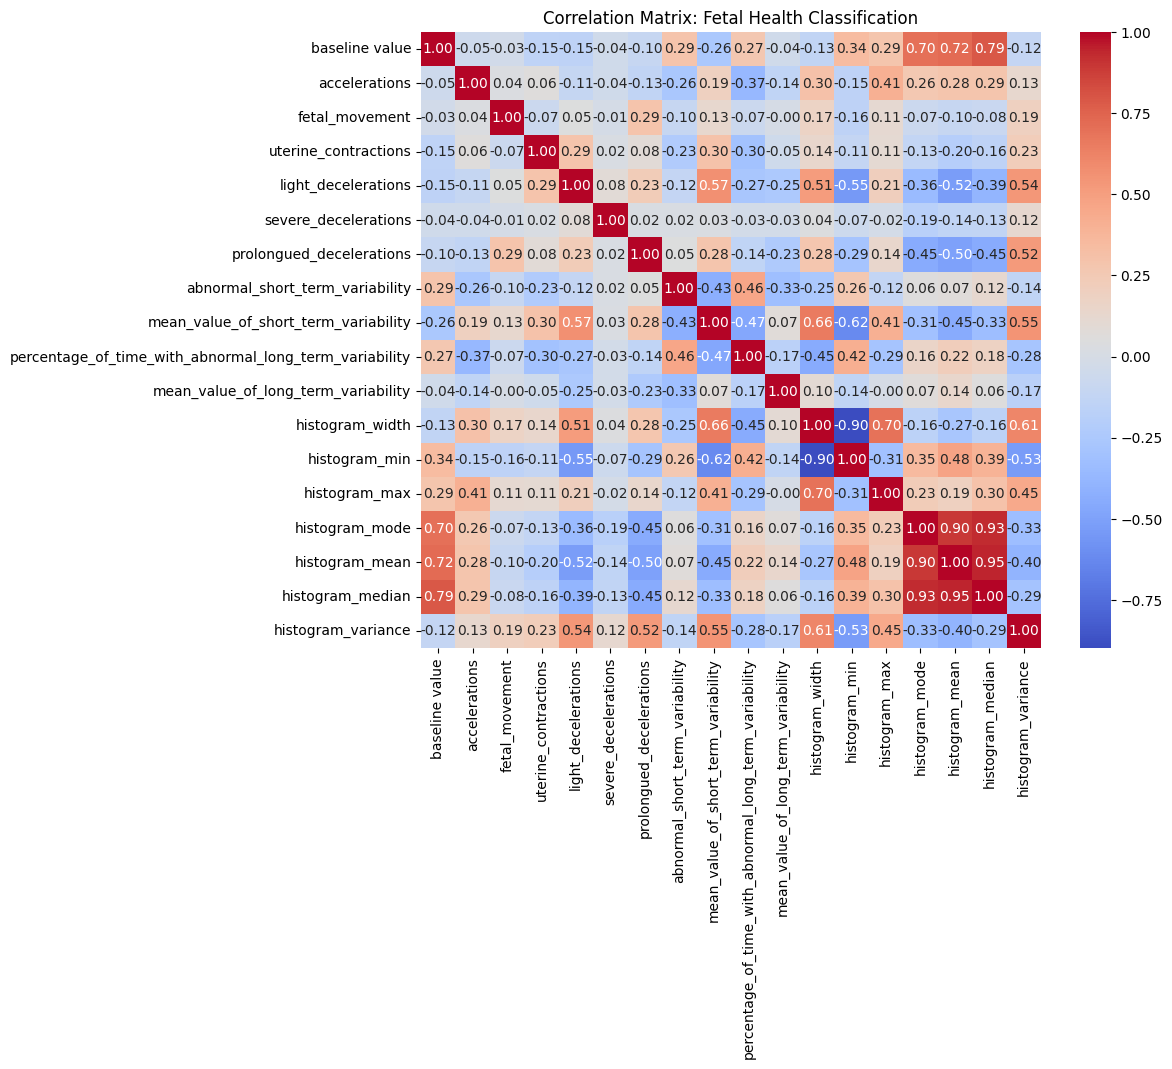

In [8]:
if __name__ == "__main__":
    # stroke prediction
    print("Stroke Prediction")
    stroke_vif = calculate_vif(strokeX)
    stroke_metrics = calculate_dataset_collinearity_metrics(strokeX)
    plot_correlation_matrix(strokeX, "Stroke Prediction")

    # Fetal Health Classification
    print("Fetal Health Classification")
    fetal_vif = calculate_vif(fetalX)
    fetal_metrics = calculate_dataset_collinearity_metrics(fetalX)
    plot_correlation_matrix(fetalX, "Fetal Health Classification")


In [9]:
stroke_vif

,Feature,VIF
0,age,1.160693
1,bmi,1.140709
2,avg_glucose_level,1.049083


In [10]:
stroke_metrics

{'Condition Number': 2.2464766708075237,
 'Determinant of Correlation Matrix': 0.8422986687380071,
 'Sum of Absolute Off-Diagonal Elements': 1.377111106997062}

In [11]:
fetal_vif

,Feature,VIF
0,baseline value,6.928571
1,accelerations,2.848498
2,fetal_movement,1.149541
3,uterine_contractions,1.268418
4,light_decelerations,3.361449
5,severe_decelerations,1.095074
6,prolongued_decelerations,2.913803
7,abnormal_short_term_variability,1.899370
8,mean_value_of_short_term_variability,3.004874
9,percentage_of_time_with_abnormal_long_term_var...,1.857886


In [12]:
fetal_metrics

{'Condition Number': 1.1709024910124722e+16,
 'Determinant of Correlation Matrix': 5.15649242895489e-21,
 'Sum of Absolute Off-Diagonal Elements': 78.23645852476265}